In [13]:
# Basic imports and setup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

# Import the new data loader and plotting functions
from analyze_modules import load_parameter_sweep, plot_profile_comparison, plot_comparison, plot_profile

In [2]:
# Define parameters for the sweep
folder = '../output/EqCond+Remove/'
P0s = np.array([1e6, 1e7, 1e8])
Tints = np.array([50, 75, 100, 125, 150, 200, 250])
CplusOs = np.array([1e-3, 3.16e-3, 1e-2, 3.16e-2, 1e-1])
CtoOs = np.array([0.1, 0.59, 1.0])

In [3]:
# --- Example 1: Sweep over C+O ---
fixed_params = {
    'P0': P0s[1],
    'Tint': Tints[2],
    'CtoO': CtoOs[1],
    'planet': 'Earth'
}
varying_param_name = 'CplusO'
varying_param_values = CplusOs

# The new loader handles the file iteration and data extraction
run_list = load_parameter_sweep(
    folder,
    fixed_params=fixed_params,
    varying_param_name=varying_param_name,
    varying_param_values=varying_param_values
)

In [4]:
def set_white(ax):
    ax.set_facecolor('white')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white', which='both')  # Set color for both major and minor ticks
    ax.tick_params(axis='y', colors='white', which='both')  # Set color for both major and minor ticks

    try: # if colorbar is present
        ax.images[0].colorbar.ax.yaxis.label.set_color('white')
        ax.images[0].colorbar.ax.tick_params(axis='y', colors='white', which='both')
        ax.images[0].colorbar.outline.set_color('white')
    except:
        pass

def increase_size(ax, linewidth=3, fontsize=14, legendcols=1, legendloc='best'):
    for l in ax.lines:
        l.set_linewidth(linewidth)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(linewidth)
    ax.xaxis.set_tick_params(width=linewidth)
    ax.yaxis.set_tick_params(width=linewidth)
    fontsize = 14
    ax.xaxis.label.set_size(fontsize)
    ax.yaxis.label.set_size(fontsize)
    ax.xaxis.set_tick_params(labelsize=fontsize)
    ax.yaxis.set_tick_params(labelsize=fontsize)
    ax.legend(fontsize=fontsize, ncols=legendcols, loc=legendloc)

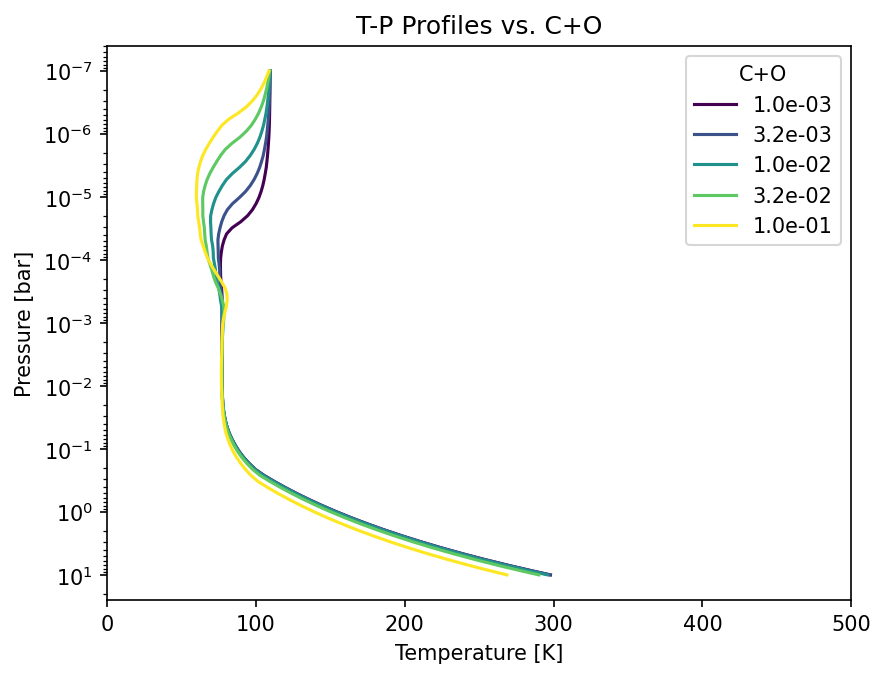

In [9]:
# Plot T-P profile comparisons across the sweep
fig, ax = plot_profile_comparison(
    run_list,
    'temperature',
    labels=[f"{v:.1e}" for v in varying_param_values]
)
plt.legend(title=varying_param_name.replace('plus', '+').replace('to', '/'))
ax.set_xlim(0, 500)
ax.set_title("T-P Profiles vs. C+O")
plt.show()

log


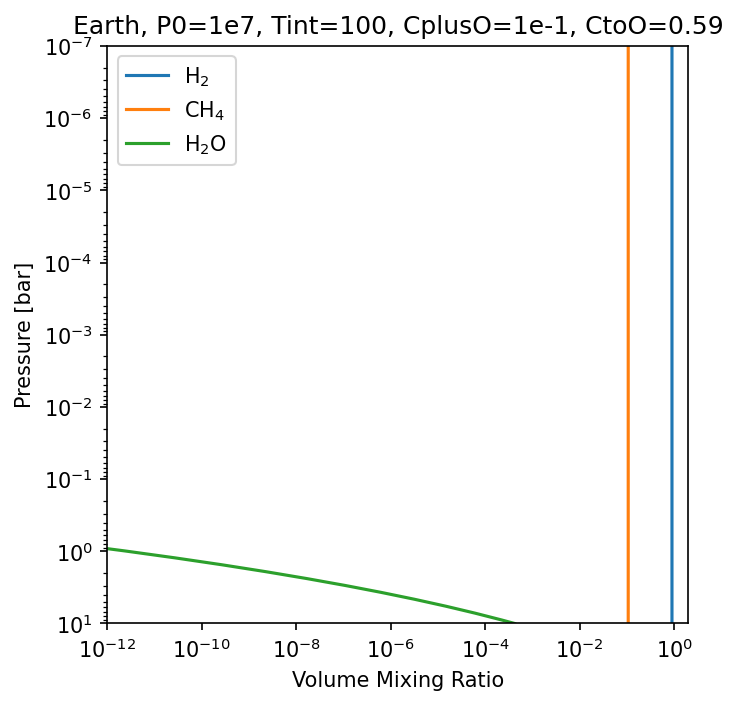

In [28]:
# plot mixing ratios for set varied parameter
i = len(run_list)-1

# Find 
threshold = 1e-12

if threshold is not None:
    mask = run_list[i].mols_vmr[-1,:,:] > threshold # ! remove iteration dimension !
    mask = np.any(mask, axis=0)
else:
    target_molecules = ['H2', 'H2O', 'CO2', 'CO', 'CH4', 'C2H2', 'C2H4']
    mask = np.isin(run_list[i].mol_names, target_molecules)

target_molecules = np.array(run_list[i].mol_names)[mask]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# plot_profile can now take a list of molecules to plot
plot_profile(
    run_list[i], 
    param_key=target_molecules, 
    y_axis='pressure', 
    log_x=True, 
    ax=ax,
    iteration_index=-1,
    mol_type='mol'
)

print(ax.get_xscale())

ax.set_xlim(1e-12, 2e0)
ax.set_ylim(run_list[i].pressures_bar.max(), run_list[i].pressures_bar.min())
ax.set_xlabel("Volume Mixing Ratio")
ax.set_title(run_list[i].run_name.replace("_", ", "))
plt.show()

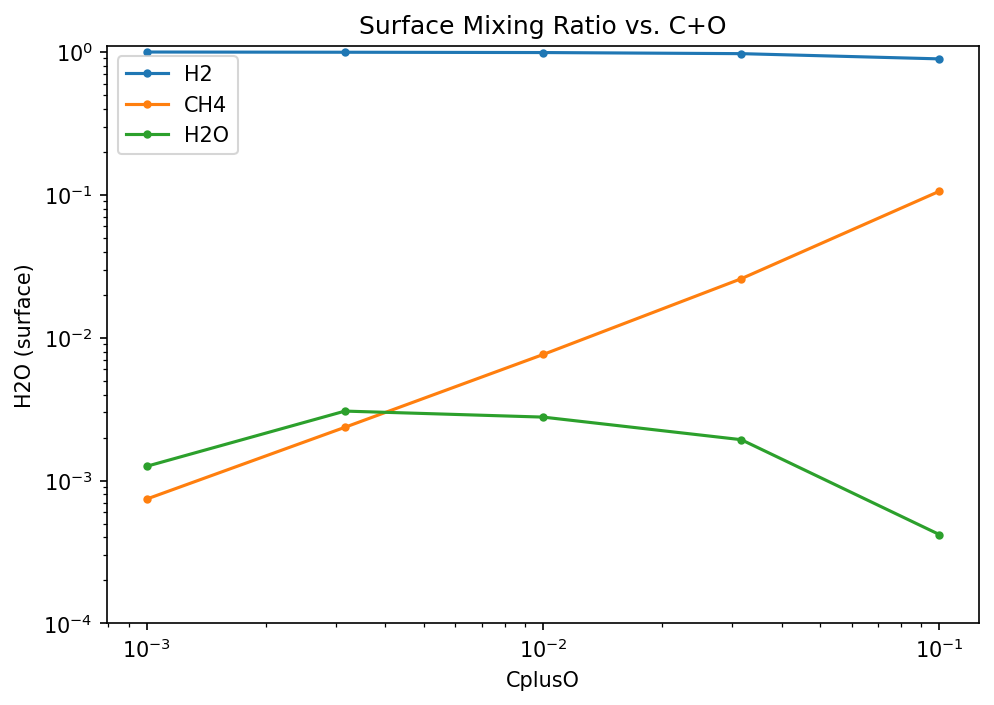

In [29]:
# Plot surface mixing ratios of multiple species vs. the swept parameter
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

# reset target molecules if needed
#target_molecules = ['H2', 'H2O', 'CO2', 'CO', 'CH4', 'C2H2']

for mol in target_molecules:
    plot_comparison(
        run_list,
        x_param_values=varying_param_values,
        y_param_key=mol,
        x_param_name=varying_param_name,
        ax=ax,
        label=mol,
        log_x=True,
        log_y=True
    )

ax.legend()
ax.set_ylim(1e-4, 1.1e0)
ax.set_title("Surface Mixing Ratio vs. C+O")
plt.show()
